In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

outdf = pd.read_csv("maps.csv", header=0)
outdf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4.0,4.0,0.9747,0.9687,0.9809,0.0,0.0,0.0191,0.0193,0.9807,0.9809,0.9807,23.5370
1,6.0,4.0,0.9754,0.9805,0.9816,0.0,0.0,0.0116,0.0297,0.9703,0.9884,0.9703,30.1519
2,8.0,4.0,0.9762,0.9616,0.9818,0.0,0.0,0.0238,0.0088,0.9912,0.9762,0.9912,29.8334
3,12.0,4.0,0.9778,0.9920,0.9836,0.0,0.0,0.0047,0.0359,0.9641,0.9953,0.9641,22.0885
4,16.0,4.0,0.9747,0.9862,0.9813,0.0,0.0,0.0081,0.0364,0.9636,0.9919,0.9636,22.3656


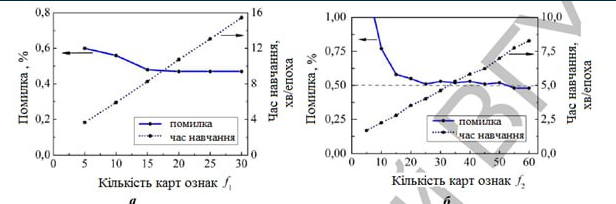

In [58]:
import seaborn as sns

In [34]:

outdf = pd.read_csv("maps.csv", header=0)

forviz = outdf.drop(columns=['5','6'])

forviz = forviz.rename(columns={'0': 'f1',       '1': 'f2',
                                '2': 'f1_score', '3': 'Precision',
                                '4': 'Accuracy', '7': 'FPR',
                                '8': 'FNR',      '9': 'Recall',
                                '10': 'TNR',     '11': 'TPR',
                                '12': 'Time'                        })

forviz['Time']  = forviz['Time'].round().astype(int)
forviz['f1']    = forviz['f1'].round().astype(int)
forviz['f2']    = forviz['f2'].round().astype(int)

forviz.reset_index(inplace=True)
forviz_sorted = forviz.set_index('index')

forviz_sorted.head(25)

---

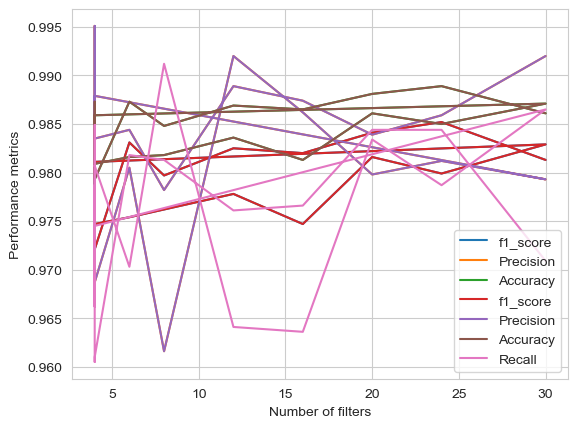

In [35]:

forviz_sorted.plot(x='f1', y=['f1_score', 'Precision', 'Accuracy'])

plt.plot(forviz_sorted['f1'], forviz_sorted['f1_score'], label='f1_score')
plt.plot(forviz_sorted['f1'], forviz_sorted['Precision'], label='Precision')
plt.plot(forviz_sorted['f1'], forviz_sorted['Accuracy'], label='Accuracy')
plt.plot(forviz_sorted['f1'], forviz_sorted['Recall'], label='Recall')

plt.xlabel('Number of filters')
plt.ylabel('Performance metrics')
plt.legend()

plt.show()

---

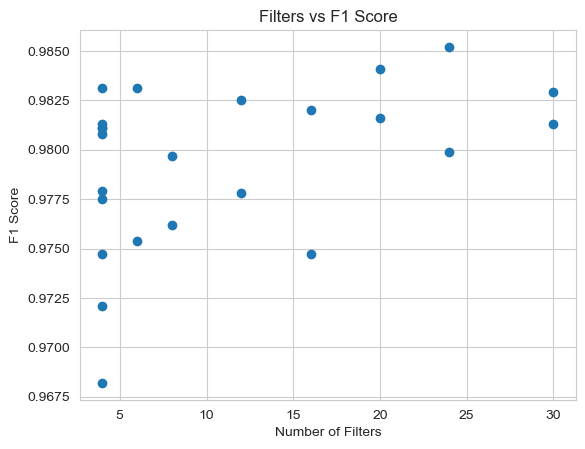

In [36]:
plt.scatter(forviz_sorted['f1'], forviz_sorted['f1_score'])
plt.xlabel('Number of Filters')
plt.ylabel('F1 Score')
plt.title('Filters vs F1 Score')
plt.show()

---

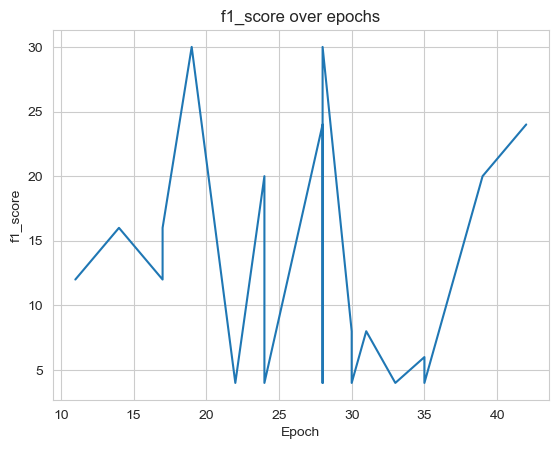

In [38]:
forviz_line= forviz_sorted.sort_values(by='Time', ascending=True)

plt.plot(forviz_line['Time'],forviz_line['f2'])
plt.title('f1_score over epochs')
plt.xlabel('Epoch')
plt.ylabel('f1_score')
plt.show()

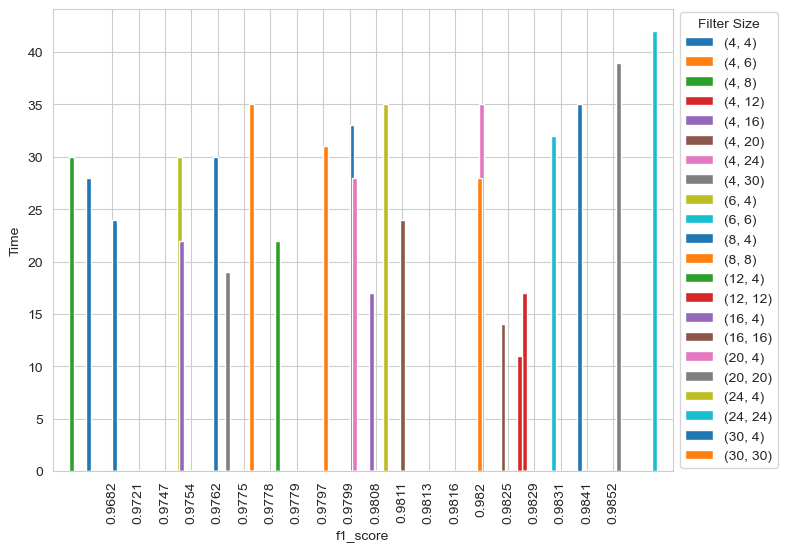

In [80]:
grouped_df = forviz_sorted.groupby(['f1','f2', 'f1_score'])['Time'].mean().reset_index()

pivoted_df = grouped_df.pivot(index='f1_score', columns=['f1','f2'], values='Time')

ax = pivoted_df.plot(kind='bar', width=4, figsize=(8,6))
ax.set_xlabel('f1_score')
ax.set_ylabel('Time')
ax.legend(loc='center left', bbox_to_anchor=(1,0.5),title='Filter Size')
plt.show()

In [72]:
grouped_df = forviz_sorted.groupby(['f1', 'f1_score'])['Time'].mean().reset_index()
pivoted_df = grouped_df.pivot(index='f1_score', columns=['f1'], values='Time')

pivoted_df.head(30)

f1,4,6,8,12,16,20,24,30
f1_score,,,,,,,,
0.9682,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.9721,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.9747,24.0,NaN,NaN,NaN,22.0,NaN,NaN,NaN
0.9754,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN
0.9762,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN
0.9775,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.9778,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN
0.9779,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.9797,NaN,NaN,31.0,NaN,NaN,NaN,NaN,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


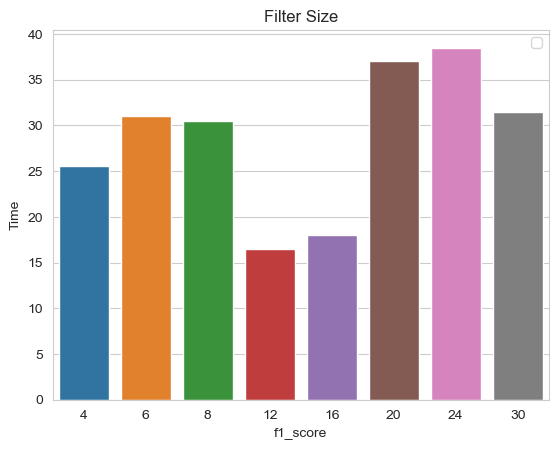

In [79]:
ax = sns.barplot(data=pivoted_df,
                 errorbar=None)
# ax = sns.barplot(data=pivoted_df, hue=pivoted_df.columns.get_level_values(0), errorbar=None)
ax.set(xlabel='f1_score',ylabel='Time', title='Filter Size')
ax.legend(loc='center left',bbox_to_anchor=(1,0.5),title='Filter Size')
plt.show()

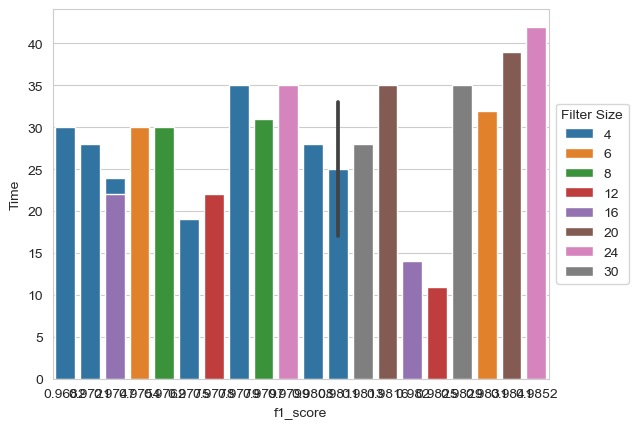

In [85]:
ax = sns.barplot(x='f1_score', y='Time', hue='f1', data=forviz_sorted, dodge=False)

ax.set_xlabel('f1_score')
ax.set_ylabel('Time')

ax.legend(loc='center left',
          bbox_to_anchor=(1,0.5),
          title='Filter Size')

# show the plot
plt.show()

---

In [86]:
fig = px.parallel_coordinates(forviz, color=forviz['f1'],title='Effect of Filter Size on CNN Performance')

fig.update_layout(
    xaxis=dict(title='Metric'),
    yaxis=dict(title='Value'),
    coloraxis=dict(colorbar=dict(title='Filter Size')),
    legend=dict(title='Filter Size'),
)

fig.show()

In [88]:
import plotly.express as px

fig = px.parallel_coordinates(forviz, color=forviz['f1'], title='Effect of Filter Size on CNN Performance')

fig.update_layout(
    xaxis=dict(title='Metric'),
    yaxis=dict(title='Value'),
    coloraxis=dict(colorbar=dict(title='Filter Size')),
    legend=dict(title='Filter Size')
)

buttons = []

for value in forviz['f1'].unique():
    visible = [True if x == value else False for x in forviz['f1']]
    button = dict(label=str(value),
                  method='update',
                  args=[{'visible': visible},
                        {'title': 'Effect of Filter Size on CNN Performance (Filter: {})'.format(value)}])
    buttons.append(button)

fig.update_layout(updatemenus=[dict(type='buttons',
                                    showactive=True,
                                    buttons=buttons)])
fig.show()


In [90]:

forviz_plotly = forviz.drop(columns=['FPR', 'FNR', 'TPR', 'TNR'])

forviz_melted = forviz_plotly.melt(id_vars=['f1', 'f2', 'Time'],
                                   value_vars=['f1_score', 'Precision', 'Accuracy', 'Recall'],
                                   var_name='metric', value_name='value')

fig = px.parallel_coordinates(forviz_melted, color='f1', dimensions=['metric', 'value', 'f1', 'f2'],
                              color_continuous_scale='Bluered', labels={'f1': 'Filter Size 1', 'f2': 'Filter Size 2'},
                              title='Effect of Filter Size on CNN Performance')

fig.update_layout(
    xaxis=dict(title='Metric'),
    yaxis=dict(title='Value'),
    coloraxis=dict(colorbar=dict(title='Filter Size')),
    legend=dict(title='Filter Size')
)

fig.show()


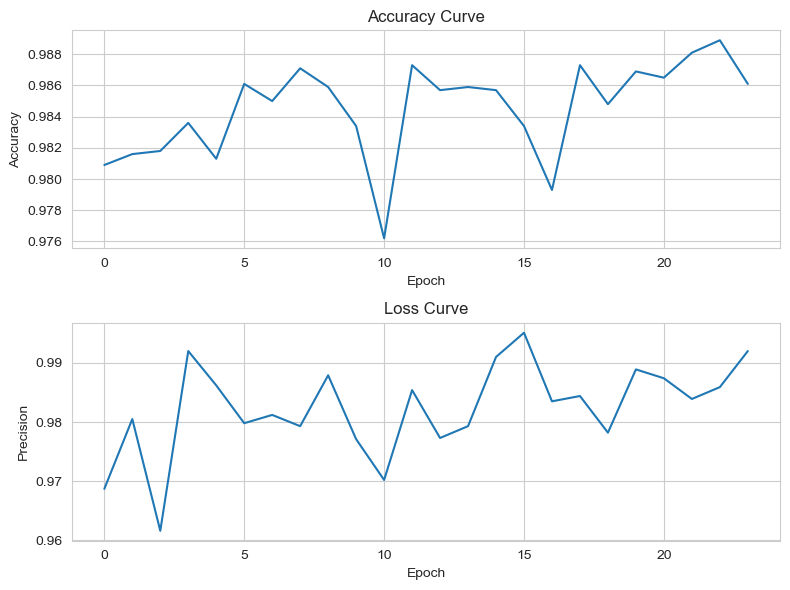

In [100]:
import matplotlib.pyplot as plt

# Extract the accuracy and loss values from your dataframe
accuracy = forviz['Accuracy']
loss = forviz['Precision']

# Create a figure with two subplots
fig, ax = plt.subplots(nrows=2, figsize=(8, 6))

# Plot the accuracy curve on the first subplot
ax[0].plot(accuracy)
ax[0].set_title('Accuracy Curve')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')

# Plot the loss curve on the second subplot
ax[1].plot(loss)
ax[1].set_title('Precision Curve')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Precision')

plt.tight_layout()
plt.show()
